Solving a variant of problem 6.3, Gray, Costanzo, and Plesha (Gray, G.L., Costanzo, F., and Plesha, M.E., *Engineering Mechanics: Dynamics*, McGraw Hill, New York, 2010.), where kinetics are included ($I_1, I_2, I_3$) and a moment $M$ is applied to the rightmost gear.

The problem statement is ``A Moment $M$ is applied to the rightmost gear (gear 3). Find the acceleration of the gear as a resulting moment presuming inertias $I_1, I_2, I_3$.''

For my class: this is Wright State  University, ME 3210, Quiz 2, Spring 2016

This notebook uses Python 3.5 in iPython (now called Jupyter).  

Image awaiting copyright approval.

In [1]:
#<img src="Gears.png">

In [2]:
# import symbolic capability to Python
from sympy import *

In [3]:
# print things all pretty
from sympy.abc import *
init_printing()

In [4]:
# Need to define variables as symbolic for sympy to use them. 
r_A, r_B, r_C, r_D, F_AB, F_DC, M= symbols("r_A r_B r_C r_D F_AB F_DC M", real = True)

In [5]:
I_1, I_2, I_3 = symbols("I_1 I_2 I_3", real = True)

In [6]:
theta_1, theta_2, theta_3 = symbols("theta_1 theta_2 theta_3", real = True)

The Free Body Diagrams, and kinematic relationships. 
<img src="images/Quiz2.png">

Defining equations. In SymPy, and equation is an expression that is equal to zero. All terms must be brought to the same side in defining it. 

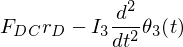

In [7]:
EA = F_DC *r_D  - I_3 * diff(theta_3(t),t,t)
EA

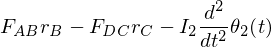

In [8]:
EB = r_B* F_AB - r_C* F_DC - I_2 * diff(theta_2(t),t,t)
EB

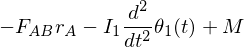

In [9]:
EC = r_A *(-F_AB) + M - I_1 * diff(theta_1(t),t,t)
EC

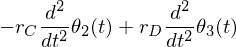

In [10]:
E1 = diff(theta_3(t),t,t)* r_D - diff(theta_2(t),t,t) *r_C
E1

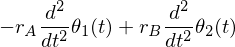

In [11]:
E2 = r_B * diff(theta_2(t),t,t) - diff(theta_1(t),t,t) *r_A
E2

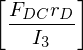

In [12]:
solve(EA,diff(theta_3(t),t,t))

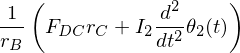

In [13]:
solve(EB,F_AB)[0]

I'm going to do substitutions in stages, eliminating one variable at a time for clarity.

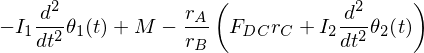

In [14]:
step1 = EC.subs(F_AB, solve(EB,F_AB)[0])
step1

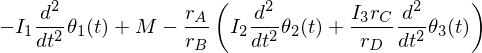

In [15]:
step2 = step1.subs(F_DC,solve(EA,F_DC)[0])
step2

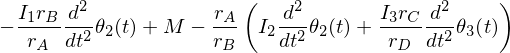

In [16]:
step3 = step2.subs(diff(theta_1(t),t,t),solve(E2,diff(theta_1(t),t,t))[0])
step3

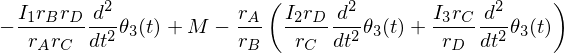

In [17]:
step4 = step3.subs(diff(theta_2(t),t,t),solve(E1,diff(theta_2(t),t,t))[0])
step4

Finally, the acceleration of the right most gear as a function of the input moment

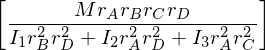

In [18]:
solve(step4,diff(theta_3(t),t,t))